In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [40]:
full = pd.read_csv('full_data.csv')
full.head()

,ANON_ID,Birthdate,Gen,Eth,Fluency,SpEd,Grade,AttRate,DaysEnr,DaysAbs,Susp,CurrWeightedTotGPA,SED,Year,School
0,338,2003-07-21,F,Latino,RFEP,Not Special Ed,9,0.9889,180.0,2.0,NaN,3.65,Unknown,17-18,Castlemont
1,340,2003-03-31,M,Latino,EL,Not Special Ed,9,0.8389,180.0,29.0,2.0,0.06,Unknown,17-18,Castlemont
2,478,2003-09-06,F,Multiple Ethnicity,EO,Special Ed,9,0.7263,179.0,49.0,1.0,0.24,Unknown,17-18,Castlemont
3,686,2000-04-02,M,Latino,EL,Not Special Ed,12,0.9611,180.0,7.0,NaN,2.00,Unknown,17-18,Castlemont
4,693,2002-03-28,F,Latino,RFEP,Not Special Ed,10,0.9889,180.0,2.0,NaN,2.59,Unknown,17-18,Castlemont


In [41]:
full['Susp'] = full['Susp'].fillna(0)
full.isnull().sum()

ANON_ID                  0
Birthdate                0
Gen                      0
Eth                      0
Fluency                  0
SpEd                     0
Grade                    0
AttRate                 29
DaysEnr                 29
DaysAbs                 29
Susp                     0
CurrWeightedTotGPA    6441
SED                      0
Year                     0
School                   0
dtype: int64

In [42]:
full = full.dropna(subset=['AttRate'])

In [43]:
full.head()

,ANON_ID,Birthdate,Gen,Eth,Fluency,SpEd,Grade,AttRate,DaysEnr,DaysAbs,Susp,CurrWeightedTotGPA,SED,Year,School
0,338,2003-07-21,F,Latino,RFEP,Not Special Ed,9,0.9889,180.0,2.0,0.0,3.65,Unknown,17-18,Castlemont
1,340,2003-03-31,M,Latino,EL,Not Special Ed,9,0.8389,180.0,29.0,2.0,0.06,Unknown,17-18,Castlemont
2,478,2003-09-06,F,Multiple Ethnicity,EO,Special Ed,9,0.7263,179.0,49.0,1.0,0.24,Unknown,17-18,Castlemont
3,686,2000-04-02,M,Latino,EL,Not Special Ed,12,0.9611,180.0,7.0,0.0,2.00,Unknown,17-18,Castlemont
4,693,2002-03-28,F,Latino,RFEP,Not Special Ed,10,0.9889,180.0,2.0,0.0,2.59,Unknown,17-18,Castlemont


In [44]:
eth = pd.get_dummies(full['Eth'])
flu = pd.get_dummies(full['Fluency'])
SpEd = full['SpEd'].apply(lambda x: False if x == 'Not Special Ed' else True).rename('isSpEd')
SED = full['SED'].apply(lambda x: True if x == 'SED' else False).rename('isSED')
school = pd.get_dummies(full['School'])
yr = pd.get_dummies(full['Year'])
male = full['Gen'].apply(lambda x: True if x == 'M' else False).rename('isMale')
N_D = pd.concat([full, eth, flu, SpEd, SED, school, yr, male], axis=1)

In [45]:
N_D.head()

,ANON_ID,Birthdate,Gen,Eth,Fluency,SpEd,Grade,AttRate,DaysEnr,DaysAbs,...,Prescott,WOMS,17-18,18-19,19-20,20-21,21-22,22-23,23-24,isMale
0,338,2003-07-21,F,Latino,RFEP,Not Special Ed,9,0.9889,180.0,2.0,...,False,False,True,False,False,False,False,False,False,False
1,340,2003-03-31,M,Latino,EL,Not Special Ed,9,0.8389,180.0,29.0,...,False,False,True,False,False,False,False,False,False,True
2,478,2003-09-06,F,Multiple Ethnicity,EO,Special Ed,9,0.7263,179.0,49.0,...,False,False,True,False,False,False,False,False,False,False
3,686,2000-04-02,M,Latino,EL,Not Special Ed,12,0.9611,180.0,7.0,...,False,False,True,False,False,False,False,False,False,True
4,693,2002-03-28,F,Latino,RFEP,Not Special Ed,10,0.9889,180.0,2.0,...,False,False,True,False,False,False,False,False,False,False


In [46]:
N_D = N_D.drop(['Birthdate', 'Gen', 'ANON_ID', 'Eth', 'Fluency', 'SpEd', 'SED', 'School', 'Year'], axis=1)

In [47]:
N_D.columns

Index(['Grade', 'AttRate', 'DaysEnr', 'DaysAbs', 'Susp', 'CurrWeightedTotGPA',
       'African American', 'Asian', 'Filipino', 'Latino', 'Multiple Ethnicity',
       'Native American', 'Not Reported', 'Pacific Islander', 'White', 'EL',
       'EO', 'IFEP', 'RFEP', 'TBD', 'Unknown', 'isSpEd', 'isSED', 'Castlemont',
       'EOP', 'Elmhurst', 'MLK', 'Mack', 'Prescott', 'WOMS', '17-18', '18-19',
       '19-20', '20-21', '21-22', '22-23', '23-24', 'isMale'],
      dtype='object')

In [48]:
N_D.head()

,Grade,AttRate,DaysEnr,DaysAbs,Susp,CurrWeightedTotGPA,African American,Asian,Filipino,Latino,...,Prescott,WOMS,17-18,18-19,19-20,20-21,21-22,22-23,23-24,isMale
0,9,0.9889,180.0,2.0,0.0,3.65,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
1,9,0.8389,180.0,29.0,2.0,0.06,False,False,False,True,...,False,False,True,False,False,False,False,False,False,True
2,9,0.7263,179.0,49.0,1.0,0.24,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
3,12,0.9611,180.0,7.0,0.0,2.00,False,False,False,True,...,False,False,True,False,False,False,False,False,False,True
4,10,0.9889,180.0,2.0,0.0,2.59,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False


In [49]:
X = N_D.drop(['DaysAbs', 'DaysEnr', 'AttRate'], axis=1)
y = N_D['AttRate']

In [50]:
X.head()

,Grade,Susp,CurrWeightedTotGPA,African American,Asian,Filipino,Latino,Multiple Ethnicity,Native American,Not Reported,...,Prescott,WOMS,17-18,18-19,19-20,20-21,21-22,22-23,23-24,isMale
0,9,0.0,3.65,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,9,2.0,0.06,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
2,9,1.0,0.24,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,False,False
3,12,0.0,2.00,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
4,10,0.0,2.59,False,False,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [51]:
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, LogisticRegression

In [52]:
standard_cols = X[['Grade', 'Susp', 'CurrWeightedTotGPA']]
minmax_cols = N_D.drop(['Grade', 'Susp', 'CurrWeightedTotGPA'], axis=1)
sScaler = preprocessing.StandardScaler()
standard_vals = sScaler.fit_transform(standard_cols.values)
standard_df = pd.DataFrame(standard_vals, columns=standard_cols.columns)

mScaler = preprocessing.MinMaxScaler()
minmax_vals = mScaler.fit_transform(minmax_cols.values)
minmax_df = pd.DataFrame(minmax_vals, columns=minmax_cols.columns)

In [53]:
norm_X = pd.concat([standard_df, minmax_df], axis=1)
norm_X.isnull().sum()

Grade                    0
Susp                     0
CurrWeightedTotGPA    6434
AttRate                  0
DaysEnr                  0
DaysAbs                  0
African American         0
Asian                    0
Filipino                 0
Latino                   0
Multiple Ethnicity       0
Native American          0
Not Reported             0
Pacific Islander         0
White                    0
EL                       0
EO                       0
IFEP                     0
RFEP                     0
TBD                      0
Unknown                  0
isSpEd                   0
isSED                    0
Castlemont               0
EOP                      0
Elmhurst                 0
MLK                      0
Mack                     0
Prescott                 0
WOMS                     0
17-18                    0
18-19                    0
19-20                    0
20-21                    0
21-22                    0
22-23                    0
23-24                    0
i

In [55]:
norm_X_dropped_x = norm_X.dropna().drop(['CurrWeightedTotGPA'], axis=1)
norm_X_dropped_y = norm_X.dropna()[['CurrWeightedTotGPA']]
norm_X_empty = norm_X[norm_X['CurrWeightedTotGPA'].isnull()].drop(['CurrWeightedTotGPA'], axis=1)
norm_X_empty

,Grade,Susp,AttRate,DaysEnr,DaysAbs,African American,Asian,Filipino,Latino,Multiple Ethnicity,...,Prescott,WOMS,17-18,18-19,19-20,20-21,21-22,22-23,23-24,isMale
3322,0.847615,-0.222064,1.0000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4569,0.847615,2.105048,0.7500,0.016760,0.005556,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5134,1.129107,-0.222064,0.2079,0.558659,0.444444,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6380,1.129107,-0.222064,0.8182,0.117318,0.022222,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
6442,-0.559844,-0.222064,0.8778,1.000000,0.122222,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20411,-1.685811,-0.222064,0.9889,1.000000,0.011111,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
20412,-0.559844,-0.222064,0.9667,1.000000,0.033333,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20413,-1.685811,-0.222064,0.9833,1.000000,0.016667,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
20414,-0.559844,-0.222064,0.6444,1.000000,0.355556,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [56]:
model = LinearRegression()
model.fit(norm_X_dropped_x, norm_X_dropped_y)

LinearRegression()

In [57]:
predictions_on_gpa = model.predict(norm_X_empty)
len(predictions_on_gpa)

6434

In [58]:
norm_X_empty['CurrWeightedTotGPA_2223'] = predictions_on_gpa
norm_X_empty

,Grade,Susp,AttRate,DaysEnr,DaysAbs,African American,Asian,Filipino,Latino,Multiple Ethnicity,...,WOMS,17-18,18-19,19-20,20-21,21-22,22-23,23-24,isMale,CurrWeightedTotGPA_2223
3322,0.847615,-0.222064,1.0000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.153969e+00
4569,0.847615,2.105048,0.7500,0.016760,0.005556,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-9.554176e-01
5134,1.129107,-0.222064,0.2079,0.558659,0.444444,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.341732e+00
6380,1.129107,-0.222064,0.8182,0.117318,0.022222,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-7.203217e-01
6442,-0.559844,-0.222064,0.8778,1.000000,0.122222,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.562498e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20411,-1.685811,-0.222064,0.9889,1.000000,0.011111,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-6.562235e+10
20412,-0.559844,-0.222064,0.9667,1.000000,0.033333,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-6.562235e+10
20413,-1.685811,-0.222064,0.9833,1.000000,0.016667,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-6.562235e+10
20414,-0.559844,-0.222064,0.6444,1.000000,0.355556,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-6.562235e+10


In [64]:
pred = list(predictions_on_gpa)
iterations = 0
final_features = norm_X.copy()
for num in list(norm_X_empty.index):
    final_features.at[num, 'CurrWeightedTotGPA'] = pred[iterations][0]
    iterations += 1
final_features.isnull().sum()

Grade                 0
Susp                  0
CurrWeightedTotGPA    0
AttRate               0
DaysEnr               0
DaysAbs               0
African American      0
Asian                 0
Filipino              0
Latino                0
Multiple Ethnicity    0
Native American       0
Not Reported          0
Pacific Islander      0
White                 0
EL                    0
EO                    0
IFEP                  0
RFEP                  0
TBD                   0
Unknown               0
isSpEd                0
isSED                 0
Castlemont            0
EOP                   0
Elmhurst              0
MLK                   0
Mack                  0
Prescott              0
WOMS                  0
17-18                 0
18-19                 0
19-20                 0
20-21                 0
21-22                 0
22-23                 0
23-24                 0
isMale                0
dtype: int64

In [66]:
len(final_features), len(y)

(21965, 21965)

In [69]:
y

0        0.9889
1        0.8389
2        0.7263
3        0.9611
4        0.9889
          ...  
21989    0.9611
21990    0.6222
21991    0.9441
21992    0.9333
21993    0.7375
Name: AttRate, Length: 21965, dtype: float64

In [73]:
final_features

,Grade,Susp,CurrWeightedTotGPA,AttRate,DaysEnr,DaysAbs,African American,Asian,Filipino,Latino,...,Prescott,WOMS,17-18,18-19,19-20,20-21,21-22,22-23,23-24,isMale
0,0.566123,-0.222064,1.259089,0.9889,1.000000,0.011111,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.566123,4.432159,-1.415302,0.8389,1.000000,0.161111,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.566123,2.105048,-1.281210,0.7263,0.994413,0.272222,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.410598,-0.222064,0.029912,0.9611,1.000000,0.038889,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.847615,-0.222064,0.469436,0.9889,1.000000,0.011111,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21960,0.284632,-0.222064,0.320445,0.9611,1.000000,0.038889,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
21961,0.003140,-0.222064,-1.460000,0.6222,0.245810,0.094444,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
21962,-0.278352,-0.222064,1.057951,0.9441,0.994413,0.055556,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21963,0.003140,-0.222064,1.266539,0.9333,1.000000,0.066667,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


In [74]:
final_features['Chronically Absent'] = final_features['AttRate'].apply(lambda x: x < .9)
final_features

,Grade,Susp,CurrWeightedTotGPA,AttRate,DaysEnr,DaysAbs,African American,Asian,Filipino,Latino,...,WOMS,17-18,18-19,19-20,20-21,21-22,22-23,23-24,isMale,Chronically Absent
0,0.566123,-0.222064,1.259089,0.9889,1.000000,0.011111,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
1,0.566123,4.432159,-1.415302,0.8389,1.000000,0.161111,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,True
2,0.566123,2.105048,-1.281210,0.7263,0.994413,0.272222,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True
3,1.410598,-0.222064,0.029912,0.9611,1.000000,0.038889,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,False
4,0.847615,-0.222064,0.469436,0.9889,1.000000,0.011111,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21960,0.284632,-0.222064,0.320445,0.9611,1.000000,0.038889,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,False
21961,0.003140,-0.222064,-1.460000,0.6222,0.245810,0.094444,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,True
21962,-0.278352,-0.222064,1.057951,0.9441,0.994413,0.055556,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,False
21963,0.003140,-0.222064,1.266539,0.9333,1.000000,0.066667,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,False


In [75]:
from sklearn.model_selection import train_test_split
model_X = final_features.drop(['Chronically Absent', 'AttRate', 'DaysAbs'], axis=1)
model_y = final_features['Chronically Absent']
X_train, X_test, y_train, y_test = train_test_split(model_X, model_y, test_size=0.2)

In [76]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, f1_score

#this function makes it easier to test ML models
def test_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    y_prediction = model.predict(X_test)
    sns.heatmap(confusion_matrix(y_test, y_prediction), annot=True)
    plt.ylabel("True Values")
    plt.xlabel("Predicted Values")
    print("Score: " + str(score))
    return score

Score: 0.42362849988618256


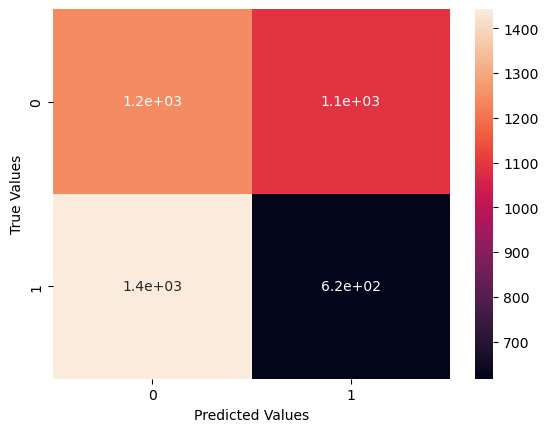

In [77]:
#LogisticRegression
LR_score = test_model(LogisticRegression(), X_train, X_test, y_train, y_test)